In [2]:
import pandas as pd
import numpy as np

# Load CSV file

In [3]:
df = pd.read_csv("data/Credit_Card_Data.csv")

# Preview Data

In [4]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Check Data Structure

In [5]:
# get information of columns, data types, missing values 
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

# See how data behaves using a histogram for MINIMUM_PAYMENTS

Text(0.5, 1.0, 'Minimum Payment Distribution')

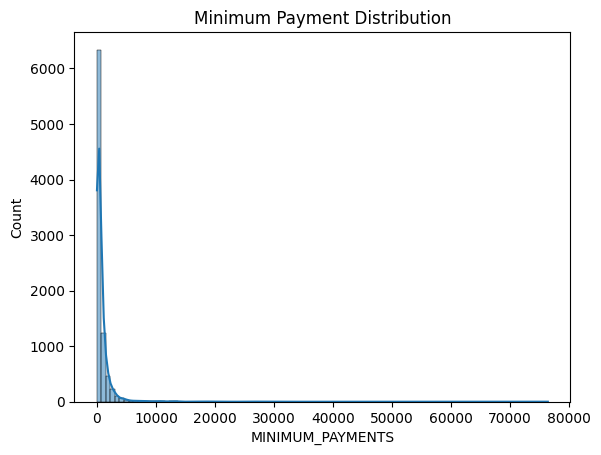

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['MINIMUM_PAYMENTS'], bins=100, kde=True)
plt.title("Minimum Payment Distribution")

In [7]:
df['MINIMUM_PAYMENTS'].describe()

count     8637.000000
mean       864.206542
std       2372.446607
min          0.019163
25%        169.123707
50%        312.343947
75%        825.485459
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

# Minimum_data is  skewed use Meadian

In [8]:
df.fillna({'MINIMUM_PAYMENTS': df['MINIMUM_PAYMENTS'].median()}, inplace=True)


In [9]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [10]:
df['CREDIT_LIMIT'].describe()


count     8949.000000
mean      4494.449450
std       3638.815725
min         50.000000
25%       1600.000000
50%       3000.000000
75%       6500.000000
max      30000.000000
Name: CREDIT_LIMIT, dtype: float64

In [11]:
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median())


In [12]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

# Columns to remove (Optional / Secondary)
## These columns are not very useful for analysis, or they can be derived from the main columns:

In [13]:

columns_to_drop = [
    'BALANCE_FREQUENCY',
    'PURCHASES_FREQUENCY',
    'ONEOFF_PURCHASES_FREQUENCY',
    'PURCHASES_INSTALLMENTS_FREQUENCY',
    'CASH_ADVANCE_FREQUENCY',
    'CASH_ADVANCE_TRX',
    'PURCHASES_TRX'
]

df.drop(columns=columns_to_drop, inplace=True)


# Check and remove duplicate rows

In [14]:
df.duplicated().sum() # See how much  duplicates
df.drop_duplicates(inplace=True)

In [15]:
df['CUST_ID'] = df['CUST_ID'].astype('string') # convert object  to  string


# Creating a new column (Feature Engineering)


In [16]:
df['CREDIT_UTILIZATION'] = df['BALANCE'] / df['CREDIT_LIMIT']


# Exploratory Data Analysis (EDA) 

In [17]:
df.head()

,CUST_ID,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CREDIT_UTILIZATION
0,C10001,40.900749,95.40,0.00,95.4,0.000000,1000.0,201.802084,139.509787,0.000000,12,0.040901
1,C10002,3202.467416,0.00,0.00,0.0,6442.945483,7000.0,4103.032597,1072.340217,0.222222,12,0.457495
2,C10003,2495.148862,773.17,773.17,0.0,0.000000,7500.0,622.066742,627.284787,0.000000,12,0.332687
3,C10004,1666.670542,1499.00,1499.00,0.0,205.788017,7500.0,0.000000,312.343947,0.000000,12,0.222223
4,C10005,817.714335,16.00,16.00,0.0,0.000000,1200.0,678.334763,244.791237,0.000000,12,0.681429


# Objective
## Gain insights based on spend, payments, and utilization

## Understand customer behavior

## Identify potential risk

# Summary Statistics

In [18]:
df.describe()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CREDIT_UTILIZATION
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,1003.204834,592.437371,411.067645,978.871112,4494.282473,1733.143852,844.906767,0.153715,11.517318,0.388884
std,2081.531879,2136.634782,1659.887917,904.338115,2097.163877,3638.646702,2895.063757,2332.792322,0.292499,1.338331,0.389722
min,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,0.000000
25%,128.281915,39.635000,0.000000,0.000000,0.000000,1600.000000,383.276166,170.857654,0.000000,12.000000,0.041494
50%,873.385231,361.280000,38.000000,89.000000,0.000000,3000.000000,856.901546,312.343947,0.000000,12.000000,0.302720
75%,2054.140036,1110.130000,577.405000,468.637500,1113.821139,6500.000000,1901.134317,788.713501,0.142857,12.000000,0.717571
max,19043.138560,49039.570000,40761.250000,22500.000000,47137.211760,30000.000000,50721.483360,76406.207520,1.000000,12.000000,15.909951


# Purchases Distribution

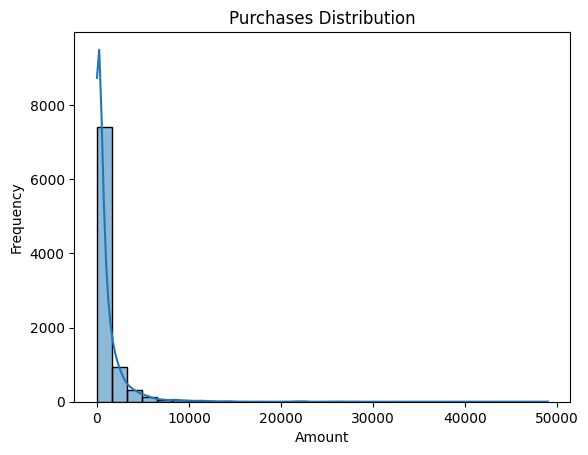

In [19]:
sns.histplot(df['PURCHASES'],bins=30,kde=True)
plt.title("Purchases Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

# Payments vs Balance Scatter Plot

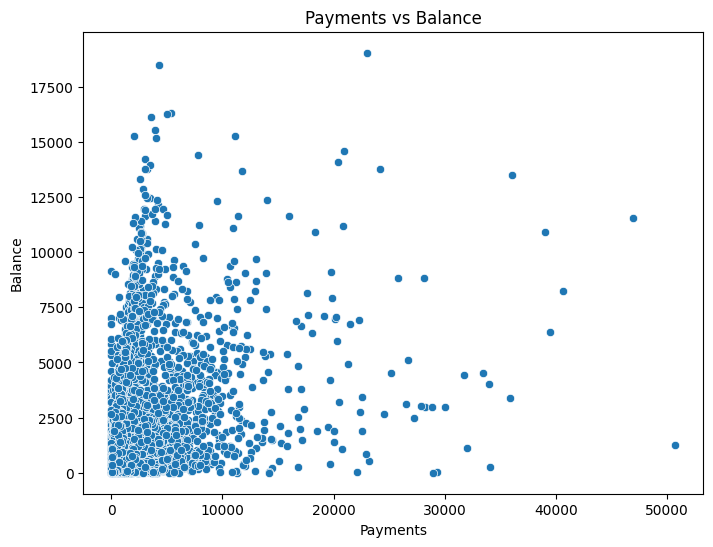

In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='PAYMENTS',y='BALANCE',data=df)
plt.title("Payments vs Balance")
plt.xlabel('Payments')
plt.ylabel('Balance')
plt.show()

# Credit Utilization Distribution

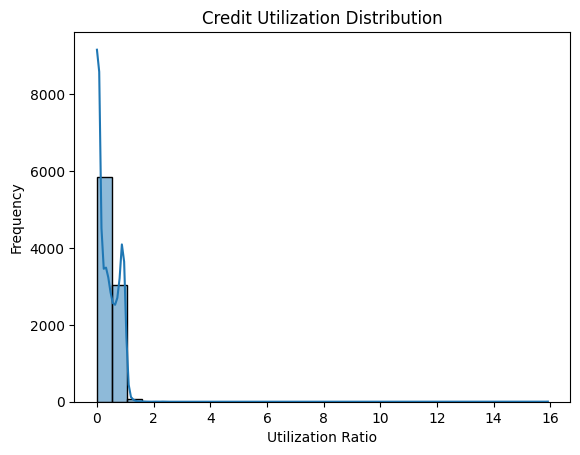

In [21]:
sns.histplot(df['CREDIT_UTILIZATION'], bins=30, kde=True)
plt.title("Credit Utilization Distribution")
plt.xlabel("Utilization Ratio")
plt.ylabel("Frequency")
plt.show()


# Correlation Matrix

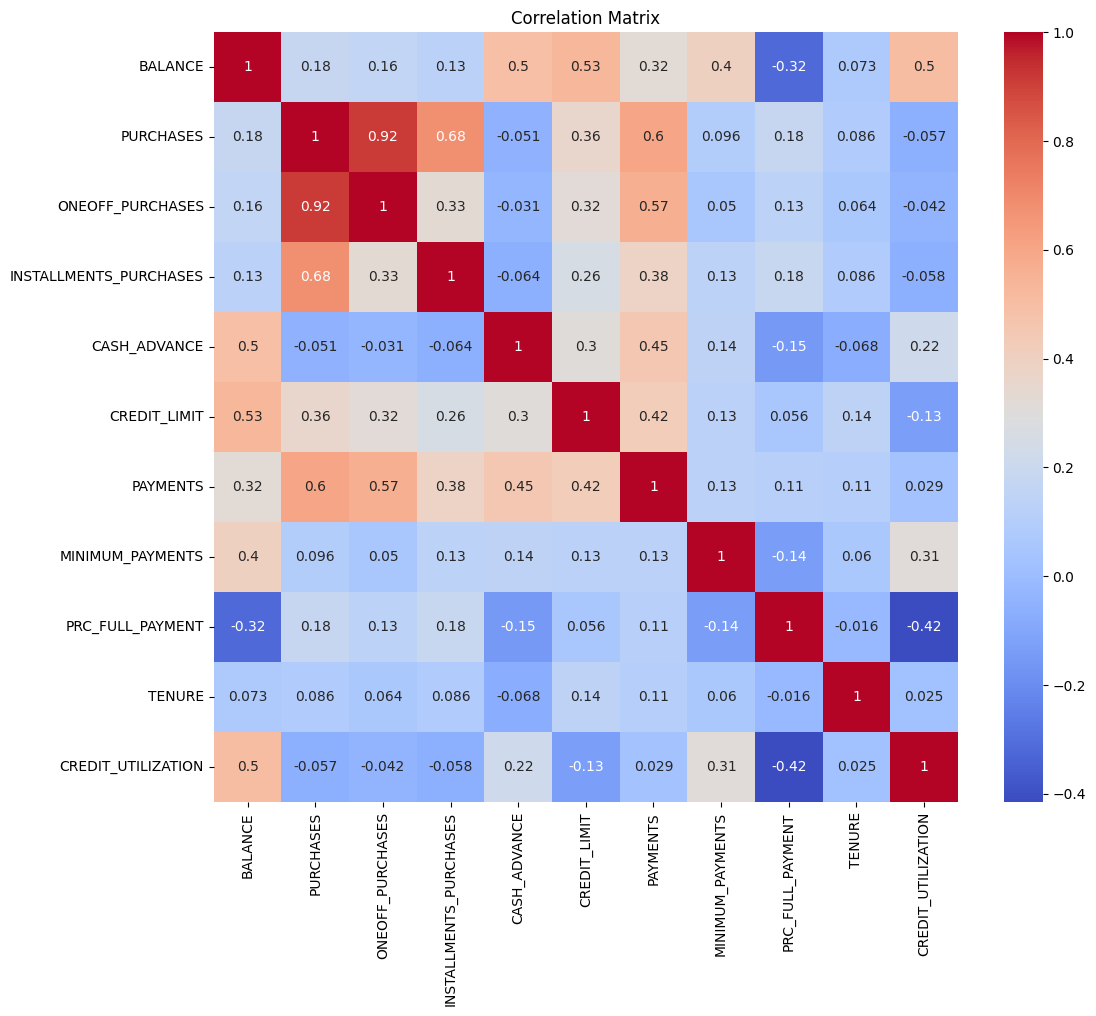

In [22]:
df_numeric = df.drop(columns=['CUST_ID'])

plt.figure(figsize=(12,10))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


# For feature selection: It can be determined which columns are strongly related to each other.

In [24]:
print(df.columns)

Index(['CUST_ID', 'BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'CREDIT_UTILIZATION'],
      dtype='object')


# Customer Segmentation

## Choose Relevant Features

In [26]:
features = ['BALANCE', 'PURCHASES', 'PAYMENTS', 'CASH_ADVANCE', 'CREDIT_UTILIZATION']
X = df[features]

## Scaling (Normalization)

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Segment'] = kmeans.fit_predict(X_scaled)


## Optimal Clusters  (Elbow Method)

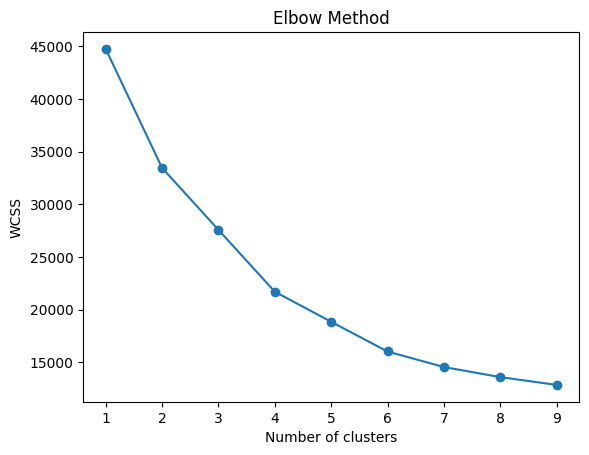

In [33]:
from sklearn.cluster import KMeans


wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 10), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


## Visualization

Text(0.5, 1.0, 'Customer Segmentation')

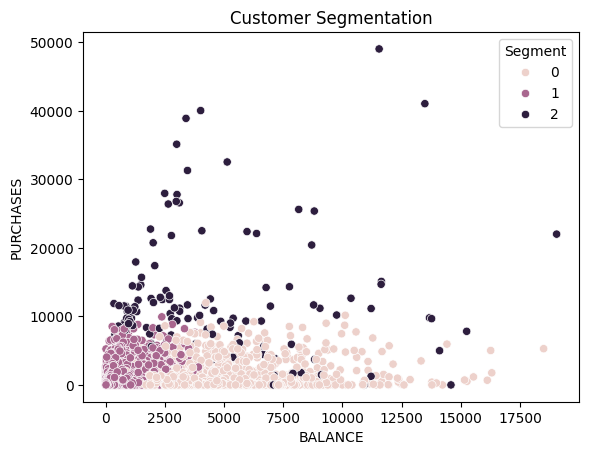

In [34]:
sns.scatterplot(x='BALANCE', y='PURCHASES', hue='Segment', data=df)
plt.title("Customer Segmentation")


In [35]:
df['Segment'].value_counts()


Segment
1    6890
0    1900
2     160
Name: count, dtype: int64

## Segment-wise Credit Utilization

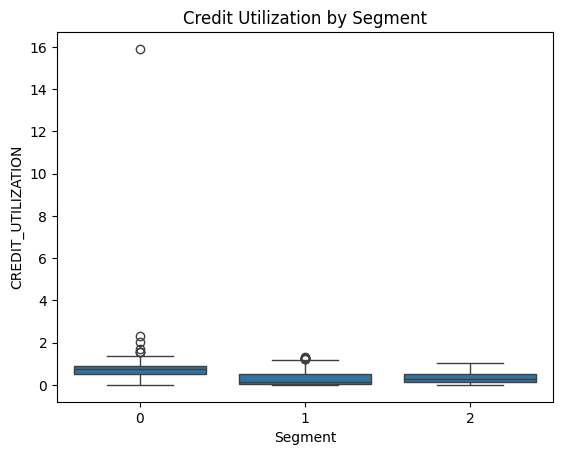

In [37]:
sns.boxplot(x='Segment', y='CREDIT_UTILIZATION', data=df)
plt.title("Credit Utilization by Segment")
plt.show()


In [ ]:
Segment   Customer Type        Strategy
0        Balanced Usage         Loyalty Program: Rewards for regular usage. Consider increasing Credit Limit. Cashback Offers
1        Low Usage              Targeted Marketing: Incentives to use the card.  Welcome Offers / Signup Bonus.  Usage-based Benefits
2        High cost, high risk   Risk Control: Credit limit limitation.  Payment Reminders / EMI Options.  Financial Counseling / Alerts

#  Conclusion